In [2]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [158]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import pandas as pd
import glob

#Ucitavanje podataka o objavama u dataframe
path = r'ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm' # use your path
all_files = glob.glob(path + "/*.csv")

df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
df = df[df.author != '[deleted]']
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] #brisanje bezimenih kolona, ovo je prva kolona u svakom csv-u i predstavlja id reda ali se broji otpocetka za svaki csv tako da ne sluzi nicemu
df.drop('distinguished', inplace=True, axis=1)
df.drop('domain', inplace=True, axis=1)
df.drop('stickied', inplace=True, axis=1)
df.drop('locked', inplace=True, axis=1)
df.drop('hide_score', inplace=True, axis=1)

print(df)


C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\reshape\concat.py:348: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


            id  \
0        648oo   
1        648op   
3        648or   
4        648os   
5        648ot   
...        ...   
2519847  7amgd   
2519848  7amge   
2519850  7amgg   
2519851  7amgh   
2519852  7amgi   

                                                                                                            url  \
0                                                        http://www.ignorancedenied.com/viewthread.php?tid=6390   
1                                                                           http://www.flascience.org/wp/?p=363   
3        http://hosted.ap.org/dynamic/stories/O/ODD_SHOWER_DOG?SITE=AZMES&amp;SECTION=HOME&amp;TEMPLATE=DEFAULT   
4                                                         http://www.sltrib.com/opinion/ci_7846101?source=email   
5        http://hosted.ap.org/dynamic/stories/O/ODD_RARE_PEARL?SITE=AZMES&amp;SECTION=HOME&amp;TEMPLATE=DEFAULT   
...                                                                                          

In [159]:
print(df['id'].isnull().values.any()) #da li ima praznih 
print(df['id'].is_unique) #da li su jedinstveni

False
False


In [160]:
df['row_id'] = df.index #indeks property je ona hidden kolona sa automatski generisanim brojevima redova
#print(df['row_id'].head())
#print(df.head())

In [161]:
import numpy as np

# Selekcija samo kolona 'id' i 'row_id' i grupisanje po id 
data_grupisano = df[['id', 'row_id']].groupby('id') #grupise po match id i u svakoj onda moze biti 1 ili vise istih id

# agg() radi agregaciju, u ovom slučaju po broju elemenata u grupi (np.size vrati broj elemenata u grupi)
data_agregirano = data_grupisano['row_id'].agg(np.size)
print(type(data_agregirano))
print(data_agregirano)

<class 'pandas.core.series.Series'>
id
6.40E+04    1
6.40E+05    1
6.40E+06    1
6.40E+07    1
6.40E+08    1
           ..
7mq3n       1
7mq3o       1
7mq3q       1
7mq3r       1
7mq3v       1
Name: row_id, Length: 2044797, dtype: int64


In [162]:
data_nonunique = data_agregirano[data_agregirano > 1]
print(data_nonunique)

id
6.50E+02    2
6.50E+03    2
6.50E+04    2
6.50E+06    2
6.50E+07    2
6.50E+08    2
6.50E+11    2
6.60E+02    2
6.60E+03    2
6.60E+05    2
6.60E+07    2
6.60E+09    2
6.60E+10    2
Name: row_id, dtype: int64


In [163]:
trazeni = data_nonunique[data_nonunique == data_nonunique.max()]
print(trazeni)
target_match_id = trazeni.keys()[0]
print(target_match_id)

id
6.50E+02    2
6.50E+03    2
6.50E+04    2
6.50E+06    2
6.50E+07    2
6.50E+08    2
6.50E+11    2
6.60E+02    2
6.60E+03    2
6.60E+05    2
6.60E+07    2
6.60E+09    2
6.60E+10    2
Name: row_id, dtype: int64
6.50E+02


In [164]:
data_target = df[df['id'] == target_match_id]
print(data_target)
print(data_target.shape)

             id  \
35894  6.50E+02   
53532  6.50E+02   

                                                                                                            url  \
35894  http://arstechnica.com/news.ars/post/20080109-apple-lowers-uk-itunes-prices-points-finger-at-labels.html   
53532                                   http://services.inquirer.net/print/print.php?article_id=20080113-112069   

                                                                             permalink  \
35894  /r/entertainment/comments/650e0/apple_lowers_uk_itunes_prices_points_finger_at/   
53532  /r/reddit.com/comments/65e01/economists_in_global_search_for_keys_to_happiness/   

            author  created_utc      subreddit subreddit_id  num_comments  \
35894      fthead9   1199903082  entertainment     t5_2qh0f             0   
53532  ScrewDriver   1200269649     reddit.com         t5_6             0   

       score  over_18  row_id  
35894      2    False   35894  
53532      0    False   53532

In [165]:
# Opet radimo sa početnom tabelom koja nema dodatu kolonu 'id'! Zato drop-ujemo kolonu 'id', posle ćemo je opet dodati.

#if 'row_id' in df.columns:
#    df = df.drop(['row_id'], axis=1) #axis = 1 znači da traži među labelama kolona, 0 medju redovima
#data = data.drop_duplicates() #ovo brise redove koji su skroz identicni
#df = df.drop_duplicates(subset='id', keep="first") #ovo brise redove koji imaju nejedinstvenu id kolonu (zadrzava prvi, ostale brise)


In [166]:
#if 'id' in df.columns:     #ovo sam zakomentarisala!! jer ce nam trebati posle taj id zbog usernet 
                            #(ne moze se samo staviti rowid umesto id)
#    df = df.drop(['id'], axis = 1)      #ovo sam zakomentarisala!! jer ce nam trebati posle taj id zbog usernet
#df['row_id'] = df.index
print(df.shape)

print(df)

(2044810, 11)
            id  \
0        648oo   
1        648op   
3        648or   
4        648os   
5        648ot   
...        ...   
2519847  7amgd   
2519848  7amge   
2519850  7amgg   
2519851  7amgh   
2519852  7amgi   

                                                                                                            url  \
0                                                        http://www.ignorancedenied.com/viewthread.php?tid=6390   
1                                                                           http://www.flascience.org/wp/?p=363   
3        http://hosted.ap.org/dynamic/stories/O/ODD_SHOWER_DOG?SITE=AZMES&amp;SECTION=HOME&amp;TEMPLATE=DEFAULT   
4                                                         http://www.sltrib.com/opinion/ci_7846101?source=email   
5        http://hosted.ap.org/dynamic/stories/O/ODD_RARE_PEARL?SITE=AZMES&amp;SECTION=HOME&amp;TEMPLATE=DEFAULT   
...                                                                            

In [167]:
df.isna().any() #prazan je distinguished koji sam izbacila

id              False
url             False
permalink       False
author          False
created_utc     False
subreddit       False
subreddit_id    False
num_comments    False
score           False
over_18         False
row_id          False
dtype: bool

In [168]:
print(df.dtypes)

id              object
url             object
permalink       object
author          object
created_utc      int64
subreddit       object
subreddit_id    object
num_comments     int64
score            int64
over_18           bool
row_id           int64
dtype: object


In [169]:
import pickle

with open("ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm/data_cleaned", 'wb') as file:  #cuvanje preciscenih podataka
    pickle.dump(df, file)

In [170]:
pathComments = r'ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm_v1.1/comments_2008' # use your path
all_filesComments = glob.glob(pathComments + "/*.csv")

df_from_each_fileComments = (pd.read_csv(f) for f in all_filesComments)
dfComments   = pd.concat(df_from_each_fileComments, ignore_index=True)
dfComments = dfComments[dfComments.author != '[deleted]']
dfComments = dfComments.loc[:, ~dfComments.columns.str.contains('^Unnamed')]
dfComments.drop('distinguished', inplace=True, axis=1)
dfComments.drop('gilded', inplace=True, axis=1)
dfComments.drop('controversiality', inplace=True, axis=1)

print(dfComments)

C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\reshape\concat.py:348: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  objs = list(objs)


              id               author   link_id   parent_id  created_utc  \
0        c02s9s6                Haven  t3_648oh  t1_c02s9rv   1199145604   
2        c02s9s8             lilmiss2  t3_648oh  t1_c02s9rv   1199145620   
6        c02s9sc  EverybodysAnAsshole  t3_648et  t1_c02s976   1199145644   
7        c02s9sd             generalk  t3_647yd  t1_c02s8md   1199145647   
8        c02s9se            seeker135  t3_6483n    t3_6483n   1199145650   
...          ...                  ...       ...         ...          ...   
7242866  c064gsy         rhythmicidea  t3_7amdg  t1_c064gqo   1225497583   
7242867  c064gsz       blackwhitegrey  t3_7ajij    t3_7ajij   1225497586   
7242868  c064gt0           Drewster58  t3_7amg7    t3_7amg7   1225497590   
7242869  c064gt1               eerock  t3_7akoc    t3_7akoc   1225497593   
7242870  c064gt2               mycall  t3_7ajjm    t3_7ajjm   1225497599   

           subreddit subreddit_id  score  
0         reddit.com         t5_6      4  
2

In [171]:
print(dfComments['id'].isnull().values.any()) #da li ima praznih 
print(dfComments['id'].is_unique)

True
True


In [172]:
dfComments.isna().any()

id               True
author          False
link_id         False
parent_id       False
created_utc     False
subreddit       False
subreddit_id    False
score           False
dtype: bool

In [173]:
nan_rows = dfComments[dfComments['id'].isnull()]
print(nan_rows)


          id     author   link_id parent_id  created_utc   subreddit  \
1717043  NaN  fuzzybunn  t3_7kef0    t1_k7p   1229661971  reddit.com   

        subreddit_id  score  
1717043         t5_6      1  


In [174]:
dfComments['row_id'] = dfComments.index
#if 'id' in dfComments.columns:   #ovo sam zakomentarisala!! jer ce nam trebati posle taj id zbog usernet
#    dfComments = dfComments.drop(['id'], axis = 1) #ovo sam zakomentarisala!! jer ce nam trebati posle taj id zbog usernet
print(dfComments)

              id               author   link_id   parent_id  created_utc  \
0        c02s9s6                Haven  t3_648oh  t1_c02s9rv   1199145604   
2        c02s9s8             lilmiss2  t3_648oh  t1_c02s9rv   1199145620   
6        c02s9sc  EverybodysAnAsshole  t3_648et  t1_c02s976   1199145644   
7        c02s9sd             generalk  t3_647yd  t1_c02s8md   1199145647   
8        c02s9se            seeker135  t3_6483n    t3_6483n   1199145650   
...          ...                  ...       ...         ...          ...   
7242866  c064gsy         rhythmicidea  t3_7amdg  t1_c064gqo   1225497583   
7242867  c064gsz       blackwhitegrey  t3_7ajij    t3_7ajij   1225497586   
7242868  c064gt0           Drewster58  t3_7amg7    t3_7amg7   1225497590   
7242869  c064gt1               eerock  t3_7akoc    t3_7akoc   1225497593   
7242870  c064gt2               mycall  t3_7ajjm    t3_7ajjm   1225497599   

           subreddit subreddit_id  score   row_id  
0         reddit.com         t5_6  

In [175]:
print(dfComments.dtypes)

id              object
author          object
link_id         object
parent_id       object
created_utc      int64
subreddit       object
subreddit_id    object
score            int64
row_id           int64
dtype: object


In [176]:
with open("ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm_v1.1/comments_2008/data_cleaned", 'wb') as file:
    pickle.dump(dfComments, file)
    

In [6]:

with open("ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm_v1.1/comments_2008/data_cleaned", 'rb') as file:
    dfComments = pickle.load(file)
    
with open("ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm/data_cleaned", 'rb') as file:
    dfSubmissions = pickle.load(file)

In [124]:
#Broj subreddit-a - provereno za mali skup od prvih 30 redova
list_subreddits_sub = set(dfSubmissions['subreddit'].unique()) #moze i po subreddit_id
list_subreddits_com = set(dfComments['subreddit'].unique())

set_of_subreddits = list_subreddits_sub.union(list_subreddits_com)
print(f"Postoji { len(set_of_subreddits) } različitih subreddit-a") # formatiranje ispisa pomoću fstringa

#5032 sa deleted

Postoji 4359 različitih subreddit-a


In [183]:
#dfgr=dfSubmissions.groupby('subreddit')['num_comments'].sum()
#trazeni = dfgr[dfgr == dfgr.max()]
#print(trazeni)

In [184]:
#Najvazniji subredditi po broju komentara - provereno
data_grupisano = dfSubmissions.groupby('subreddit')

data_agregirano = data_grupisano['num_comments'].agg('sum')
w=data_agregirano.nlargest(10)
for index, val in w.iteritems():
    print(index, val)

reddit.com 1384707
politics 820115
programming 357758
pics 292555
science 281327
worldnews 252849
WTF 192130
funny 184398
technology 167204
business 157685


In [7]:
#Najvazniji subredditi po broju korisnika - provereno

dfComAndSub=pd.concat([dfSubmissions, dfComments], axis=0)
data_grupisano = dfComAndSub.groupby('subreddit') 
data_grupisano = data_grupisano.agg({"author": "nunique"}) #nunique Count number of distinct elements

#data_agregirano = data_grupisano['author'].agg('count')
data_grupisano=data_grupisano.nlargest(10,'author')

data_grupisano = data_grupisano.reset_index()

print(data_grupisano)
#for index, val in w.iteritems():
#    print(index, val)


       subreddit  author
0     reddit.com  163784
1       politics   38377
2           pics   29753
3     technology   28337
4          funny   28186
5  entertainment   26361
6        science   25855
7    programming   25820
8       business   25254
9      worldnews   24937


In [186]:
#Prosecan broj korisnika po subredditu - provereno

data_grupisano = dfComAndSub.groupby('subreddit') 

data_grupisano = data_grupisano.agg({"author": "nunique"})
print(data_grupisano.mean()) #avg


author    148.667814
dtype: float64


In [51]:
#korisnici sa najvećim brojem objava - provereno
data_grupisano = dfSubmissions.groupby('author')
data_grupisano = data_grupisano['row_id'].agg(np.size)
#2. nacin data_grupisano = dfSubmissions.groupby('author').size()
data_grupisano=data_grupisano.nlargest(10)
#data_grupisano = data_grupisano.reset_index()
#print(data_grupisano)
for index, val in data_grupisano.iteritems():
    print(index, val)


185355
gst 18870
qgyh2 12238
rmuser 9822
twolf1 8597
IAmperfectlyCalm 8308
qazamisan 6927
charlatan 5998
igeldard 5373
noname99 5334
democracy101 5332


In [188]:
# korisnici sa najvećim brojem komentara - provereno
data_grupisano = dfComments.groupby('author')
data_grupisano = data_grupisano['row_id'].agg(np.size)
data_grupisano=data_grupisano.nlargest(10)
for index, val in data_grupisano.iteritems():
    print(index, val)
    


NoMoreNicksLeft 13480
malcontent 12159
matts2 11672
mexicodoug 9169
7oby 9161
aletoledo 8085
mutatron 7771
otakucode 7759
redditcensoredme 7468
h0dg3s 7439


In [189]:
#Koji korisnici su aktivni na najvećem broju sabredita? Na koliko su sabredita aktivni? - provereno
data_grupisano = dfComAndSub.groupby('author') 
data_grupisano = data_grupisano.agg({"subreddit": "nunique"})
data_grupisano=data_grupisano.nlargest(10,'subreddit')
data_grupisano = data_grupisano.reset_index()
print(data_grupisano)

#data_agregirano = data_grupisano['subreddit'].agg('count')
#w=data_agregirano.nlargest(5)
#for index, val in w.iteritems():
#    print(index, val)
    


           author  subreddit
0        MrKlaatu        181
1        Escafane        154
2       omfgninja        122
3        codepoet        111
4  scientologist2        111
5    turkourjurbs        110
6     Sylveran-01        107
7           b34nz        107
8      krugerlive        106
9          tuoder        103


In [ ]:
print(data_intersection_author_com)

88573
185355
47279
Pearsons correlation: 0.150


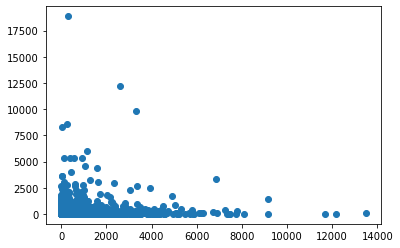

In [8]:
#Kako su korelisani brojevi objava i brojevi komentara korisnika? Odrediti Pirsonov koeficijent korelacije i izvršiti vizuelizaciju.
#PROVERITI!!!

# brojevi komentara korisnika
data_grupisanoC = dfComments.groupby('author')
data_grupisanoC = data_grupisanoC['row_id'].agg(np.size)
data_grupisanoC = data_grupisanoC.reset_index()
#print(data_grupisanoC.values)
#print(data_grupisanoC.value_counts())
list_authors_com = set(data_grupisanoC['author'])
print(len(list_authors_com))


#brojevi objava korisnika
data_grupisanoS = dfSubmissions.groupby('author')
data_grupisanoS = data_grupisanoS['row_id'].agg(np.size)
data_grupisanoS = data_grupisanoS.reset_index()
list_authors_sub = set(data_grupisanoS['author'])
print(len(list_authors_sub))

#kao prvo moramo da izbacimo znacajan broj autora iz komentara/objava koji nisu u preseku (nisu i komentarisali i objavljivali), 
#samim tim korelacija je vec vidno smanjena.
#broj jedinstvenih korisnika koji su komentarisali:88573
#broj jedinstvenih korisnika koji su objavljivali:185355
#broj jedinstvenih korisnika koji su komentarisali i objavljivali:47279, dakle ogroman broj korisnika je otpao, nisu korelisani
#dalje se dobija koef. korelacija od korisnika koji su komentarisali i objavljivali 0.15 sto opet ukazuje na slabu korelaciju
#The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative correlation
#to a full positive correlation. A value of 0 means no correlation. The value must be interpreted, where often a value below
#-0.5 or above 0.5 indicates a notable correlation, and values below those values suggests a less notable correlation.

list_intersection=list(list_authors_sub & list_authors_com)
print(len(list_intersection))
data_intersection_author_com=data_grupisanoC[data_grupisanoC['author'].isin(list_intersection)]
data_intersection_author_sub=data_grupisanoS[data_grupisanoS['author'].isin(list_intersection)]
#print(data_intersection_author_com)
#print(data_intersection_author_sub)

#from matplotlib import pyplot
#data_intersection_author_com.plot(x='author', y='row_id', style='o')

#pyplot.scatter(data_intersection_author_com, data_intersection_author_sub)
#pyplot.show()

from scipy.stats import pearsonr
corr, _ = pearsonr(data_intersection_author_com['row_id'], data_intersection_author_sub['row_id'])
print('Pearsons correlation: %.3f' % corr)

plt.scatter(data_intersection_author_com['row_id'], data_intersection_author_sub['row_id'])
plt.show() # Depending on whether you use IPython or interactive mode, etc.
#a trebalo bi da bude jedna prava da su korelisani

In [10]:
#Koje objave poseduju najveći broj komentara i na kojim su sabreditima postavljene? 
#Prikazati podatke o tim objavama, uključujući to na kojem su sabreditu postavljene i šta 
#im je sadržaj (ako je polje objave “over 18” postavljeno na false).

#print(dfSubmissions)
dfSubmissionsSorted=dfSubmissions[dfSubmissions['over_18']==False].sort_values(by=['num_comments'], inplace=False, ascending=False) #ako je inplace true sortira nam u dfSubmissions 
pd.set_option('max_colwidth', 400)
print(dfSubmissionsSorted.head(10))

print(dfSubmissionsSorted['permalink'].head(10))


            id  \
1470752  6nz1k   
2428144  78n1v   
135995   675oj   
326364   7beo2   
1743984  6tvaz   
1985077  6z2e2   
1072149  6fccd   
137102   676ja   
2224242  7488a   
1087277  6fo4i   

                                                                                                            url  \
1470752                                                                               http://hundredpushups.com   
2428144                                          http://www.time.com/time/nation/article/0,8599,1822455,00.html   
135995   https://www.reddit.com/r/reddit.com/comments/675oj/post_the_funniest_joke_you_know_upmod_the_best_one/   
326364                              https://www.reddit.com/r/politics/comments/7beo2/obama_wins_the_presidency/   
1743984      https://www.reddit.com/r/politics/comments/6tvaz/im_a_bleedingheart_liberal_but_am_i_the_only_one/   
1985077            http://www.nytimes.com/reuters/us/international-usa-politics-palin.html?_r=1&amp;oref=slogin

In [192]:
G = nx.Graph() # pravi praznu mrežu
G.add_nodes_from(set_of_subreddits) # dodaje čvorove čije su labele u "set_of_subreddits"

In [193]:
dict = {}

for index, row in dfComAndSub.iterrows():
    author=row['author']
    subreddit=row['subreddit']
    if author in dict:
          #dict[author].append(subreddit) #ovo ce cuvati i subbredite koji se ponavljaju, ako nam treba da brojimo za vecu tezinu ako je vise puta objavljivao na istom subredditu
        if subreddit not in dict[author]:
            dict[author].append(subreddit)
    else:
          dict[author] = [subreddit]
            
            


In [194]:
#sada imamo recnik (hashtable) sa korisnicima i subredditima na kojima su bili aktivni
#print(dict)

import itertools

for key, value in dict.items(): 
    lista=value
    combinations=list(itertools.combinations(lista, 2)) #pravi sve kombinacije bez ponavljanja sa dva elementa 
    for subreddit1,subreddit2 in combinations:
        if (subreddit1, subreddit2) in G.edges:#ako vec postoji ta grana, inkrementiramo tezinu
             G.edges[subreddit1, subreddit2]['weight'] += 1 #posto je ovaj graf neusmeren, nebitno ko je prvi cvor, da je usmeren moralo bi se paziti
        else: #ako ne postoji postavimo novu granu sa tezinom 1
             G.add_edge(subreddit1, subreddit2, weight=1)


In [195]:
output_path = "undirected_count_aggregation.gml" #SNET

nx.write_gml(G, output_path)

In [227]:
G= nx.read_gml("undirected_count_aggregation.gml")

In [228]:
print(nx.info(G))

Graph with 4359 nodes and 156959 edges


In [23]:
#7) Kolika je gustina mreže?

print(nx.density(G))
#num=G.number_of_nodes()
#numEdges=G.number_of_edges()
#maxnum=(num-1)*num/2   #9498261
#print(numEdges/maxnum)


0.016525024949303878


8) Kolike su prosečne distance u okviru mreže i dijametar mreže?

Average Path length: 2.098574623067938

Diameter: 5

U kojoj meri je mreža povezana i centralizovana? Navesti broj i veličine povezanih 
komponenata i proceniti da li postoji gigantska komponenta. 


In [33]:
component_size_list = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)] #connected_components(G) izvuce generatore za povezane komponente, sortira se po duzini generatora
print(component_size_list) #imamo jednu dominantnu komp, ostale su male
print('Broj povezanih komponenti: '+str(len(component_size_list)))
print('Postoji jedna gigantska komponenta veličine 3524, 3 komponente veličine 3, 16 veličine 2 i ostale su veličine 1.')

[3524, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [34]:
# ekstrakcija dominantne komponente
largest_cc = max(nx.connected_components(G), key=len)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
Gdom = G.subgraph(largest_cc).copy()
print(f"Dominantna komponenta ima {len(Gdom.nodes())} čvorova i {len(Gdom.edges())} grana")

Dominantna komponenta ima 3524 čvorova i 156934 grana


In [ ]:
dominant_component_path = "dominantna_komponenta.net"
nx.write_pajek(Gdom, dominant_component_path)
output_path = "dominantna_komponenta.gml"
nx.write_gml(Gdom, output_path)

10) Koliki je prosečni, a koliki globalni koeficijent klasterizacije mreže? Kakva je raspodela 
lokalnog koeficijenta klasterizacije njenih čvorova? Da li je klasterisanje izraženo ili ne?
Odgovor dati upoređivanjem sa slučajno generisanom Erdos-Renyi mrežom istih 
dimenzija. 

In [ ]:
#iz gephi-ja vrednosti
#Average Clustering Coefficient: 0.907
    
#ER    
#erdos_renyi_graph(num, p, seed=None, directed=False)    
#Average Clustering Coefficient: 0.017


In [59]:
#Prosecni koeficijent klasterizaije za nasu mrezu iz nx (bez weight smo)
nx.average_clustering(G)

0.625005379041094

In [58]:
#Globalni koeficijent klasterizacije (3*numOfTriangles/numOfTriads, svi trouglovi/sve triade)
glob_koef=nx.transitivity(G)
print(glob_koef)

0.2673082405054368


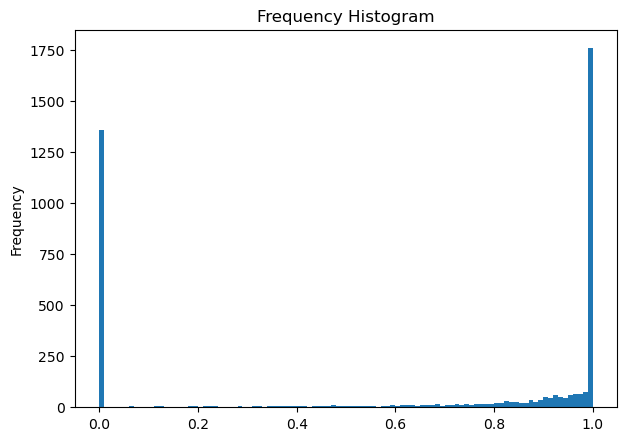

In [110]:
dict=nx.clustering(G).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Local clustering coefficient');

In [111]:
#nas nacin za racunanje klasterizacije (prosek gustina ego mreza svakog cvora) - provera, ne uzimati ovo
#list_densities=[]
#for n in G.nodes():
#    ego=nx.ego_graph(G,n)
#    list_densities.append(nx.density(ego))


In [93]:
#za dominantnu
list_densities_dom=[]
for n in Gdom.nodes():
    ego=nx.ego_graph(Gdom,n)
    list_densities_dom.append(nx.density(ego))


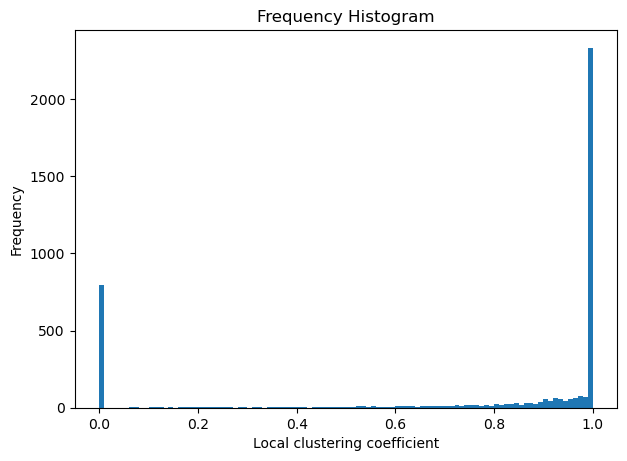

In [115]:
#print(sum(list_densities_dom)/len(list_densities_dom))
#print(sum(value == 0 for value in list_densities_dom))
#print(sum(value == 1 for value in list_densities_dom))

%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = list_densities
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Local clustering coefficient');

In [174]:
#Stepen klasterisanja može se proceniti na osnovu koeficijenta klasterisanja. 
#subreddit, clustering_coef = zip(*nx.clustering(G, weight = "weight").items())  #izracunamo lokalni klastering koeficijent za svaki od cvorova

#nenula = [(subr, cc)  for subr, cc in zip(subreddit, clustering_coef) if cc > 0]

#df = pd.DataFrame(nenula, columns = ["subreddit", "cc"])
#df.sort_values('cc', inplace = True)

#max_lokalni_stepen_klasterisanja = max(clustering_coef)

#prosecni_stepen_klasterisanja = nx.average_clustering(G)

#print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}") #u %
#print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
#print("Lokalni stepeni klasterisanja koji nisu nula:") #jako ih je malo jer je slabo klasterisano, ima malo grana
#print(df)

Max lokalni cc: 0.0011327274855461233
Prosečan cc: 0.625005379041094


In [238]:
#Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m? //da bi bio isti br grana kao u nasoj mrezi //ovde postoji verovatnoca postojanja grane
m=G.number_of_edges()
n=G.number_of_nodes()
p = ( 2*float(m) ) / ( n* (n-1) ) 
er_mreza = nx.erdos_renyi_graph(n,p)

Graph with 4359 nodes and 157978 edges


In [117]:
#Prosecni koeficijent klasterizaije za ER iz nx
nx.average_clustering(er_mreza)

0.01647895617473764

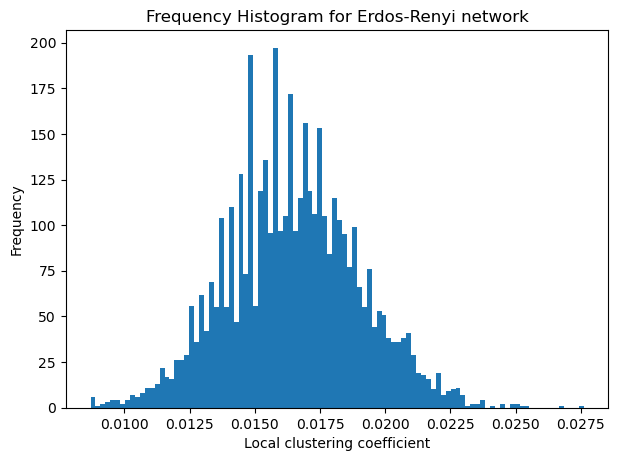

In [116]:
#Lokalni koeficijent klasterizaije za ER
dict_er=nx.clustering(er_mreza).values() #average_clustering je avg ovih vrednosti
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})# Plot Histogram on x
x = dict_er
plt.hist(x, bins=100)
plt.gca().set(title='Frequency Histogram for Erdos-Renyi network', xlabel='Local clustering coefficient',ylabel='Frequency');

Klasterizacija je veoma izražena kod SNet mreže jer najveći broj čvorova ima veliki koeficijent klasterizacije, 
dok je kod Ernos-Renyi mreže veoma malo izražena, sa prosečnim stepenom klasterizacije oko 0.0165.

Na osnovu odgovora na pitanja 8 i 10, proceniti da li mreža iskazuje osobine malog sveta.
S obzirom na veoma male vrednosti prosečne distance (2) i dijametra(5), može se zaključiti da se do bilo kog čvora može doći u veoma malom broju koraka, što nas dovodi do zaključka da naša mreža pokazuje osobine malog sveta. Takođe, uzimajući u obzir i  veliki stepen klasterizacije čvorova u jezgru, zaključujemo da čak iako smo na periferiji, možemo doći preko jegra do bilo kog drugog čvora u malom broju koraka.

In [120]:
#Izvršiti asortativnu analizu po stepenu čvora i dati odgovor da li je izraženo asortativno mešanje. 
#U slučaju da je mreža usmerena, analizu izvršiti i po ulaznom i po izlaznom stepenu čvora. Priložiti i vizuelizaciju. 

#Analiza asortativnosti - meri koliko se cvorovi vezuju sa sebi slicnim cvorovima
#U ovoj analizi ćemo prvo sprovesti analizu asortativnosti na osnovu stepena čvora, jer nas interesuje da li se međusobno vezuju čvorovi koji su sličnog stepena, ili habovi (čvorovi velikog stepena) teže da se slabo međusobno vezuju, a mnogo vezuju sa čvorovima malog stepena.
#Uvodi se koeficijent asortativnosti r, koji je u opsegu od -1 do 1. Mreža sa r = 1 iskazuje savršeno asortativno mešanje (perfect assortative mixing pattern), kad je r = 0 mreža je neasortativna ili neutralna, dok je u slučaju r = −1 mreža potpuno disasortativna.
# asortativnost na osnovu netežinskog stepena čvora
r1 = nx.degree_assortativity_coefficient(G)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

#U slučaju netežinskog grafa mreža je disasortativna, odnosno, čvorovi sličnog stepena se retko vezuju međusobno.
#U slučaju težinskog grafa mreža je neasortativna(neutralna).

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: -0.43650592278164835
Koeficijent asortativnosti na osnovu težinskog stepena čvora: -0.03227849187951864


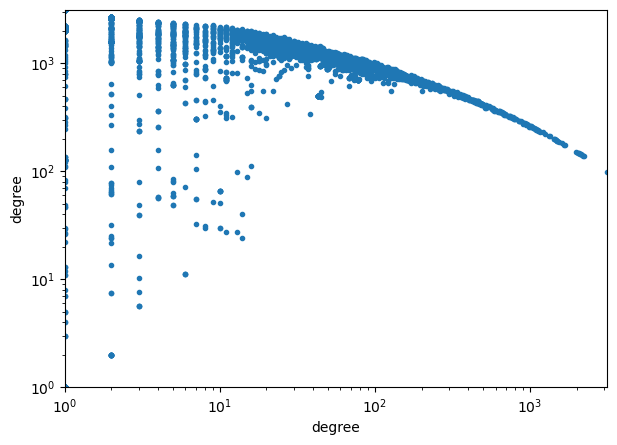

In [138]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  

y=[]
for n in G.nodes():
    list_n=[n]
    
    degree=nx.average_neighbor_degree(G,nodes=list_n)
    #print(degree)
    #print('ok')
    y.append(list(degree.values())[0])

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(deg_list, y, marker='.')                                                                                                    
plt.show()

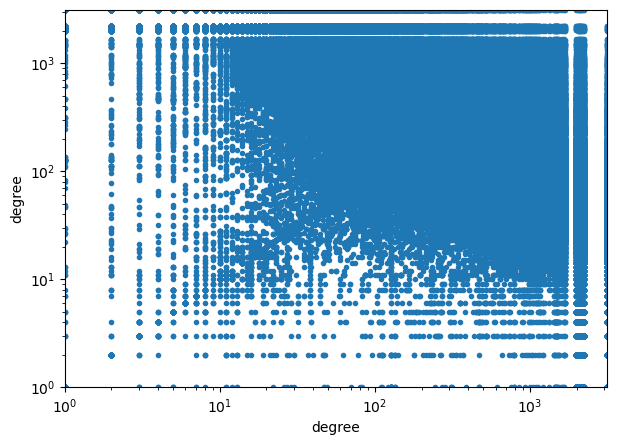

In [140]:
degrees = G.degree()
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
_, deg_list = zip(*degrees)

plt.figure(1)   

# prep axes   

plt.xlabel('degree')                                                                                                             
plt.xscale('log')                                                                                                                
plt.xlim(1, max(deg_list))  
x=[]
y=[]
for n in G.nodes():
    degreeN=G.degree(n)
    for nn in G.neighbors(n):
        degreeNN=G.degree(nn)
        x.append(degreeN)
        y.append(degreeNN)

plt.ylabel('degree')                                                                                                          
plt.yscale('log')                                                                                                                
plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

Na osnovu grafika vidimo... 

Broj grana originalne mreže minus broj grana u ER mreži iznosi 272, što je odstupanje od 0.1732936626762403%
Counter({70: 219, 71: 214, 72: 213, 74: 211, 68: 205, 73: 203, 75: 174, 66: 170, 69: 167, 77: 167, 67: 167, 78: 164, 76: 163, 64: 147, 65: 141, 79: 139, 80: 126, 81: 117, 63: 106, 61: 104, 82: 95, 62: 91, 84: 87, 59: 76, 83: 75, 85: 69, 60: 67, 58: 58, 86: 54, 87: 48, 57: 45, 88: 38, 56: 33, 89: 25, 55: 24, 54: 21, 90: 18, 52: 15, 91: 15, 92: 14, 53: 14, 49: 8, 51: 7, 93: 7, 50: 6, 48: 5, 95: 5, 94: 5, 97: 3, 96: 3, 45: 2, 47: 2, 99: 1, 41: 1, 102: 1, 46: 1, 98: 1, 104: 1, 100: 1})


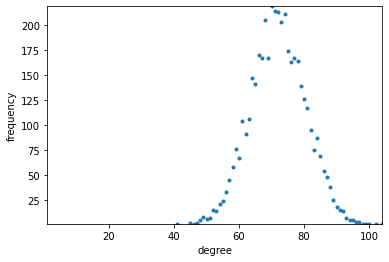

Counter({70: 219, 71: 214, 72: 213, 74: 211, 68: 205, 73: 203, 75: 174, 66: 170, 69: 167, 77: 167, 67: 167, 78: 164, 76: 163, 64: 147, 65: 141, 79: 139, 80: 126, 81: 117, 63: 106, 61: 104, 82: 95, 62: 91, 84: 87, 59: 76, 83: 75, 85: 69, 60: 67, 58: 58, 86: 54, 87: 48, 57: 45, 88: 38, 56: 33, 89: 25, 55: 24, 54: 21, 90: 18, 52: 15, 91: 15, 92: 14, 53: 14, 49: 8, 51: 7, 93: 7, 50: 6, 48: 5, 95: 5, 94: 5, 97: 3, 96: 3, 45: 2, 47: 2, 99: 1, 41: 1, 102: 1, 46: 1, 98: 1, 104: 1, 100: 1})


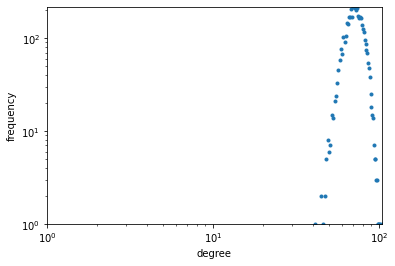

In [46]:
#Kako bi se ponašala slučajno generisana mreža sa istim brojem čvorova i grana (Gnm generator iz paketa networkx)?
#n = G.number_of_nodes()
#m = G.number_of_edges()
#Gnm = nx.gnm_random_graph(n, m) 

#plot_deg_frequency(Gnm, xscale = 'linear', yscale = 'linear')
#plot_deg_frequency(Gnm, xscale = 'log', yscale = 'log')

#vidimo da  ne lici na nasu mrezu, dakle postoji neka pravilnost u nasoj mrezi, nisu stepeni slucajno raporedjeni

#Kako bi se ponašala Erdos-Renyi mreža sa koja ima isti broj čvorova n, a verovatnoća formiranja grane je takva da je očekivani broj grana u mreži m? //da bi bio isti br grana kao u nasoj mrezi //ovde postoji verovatnoca postojanja grane
#p = ( 2*float(m) ) / ( n* (n-1) ) 
#er_mreza = nx.erdos_renyi_graph(n,p)

#delta_m = m - er_mreza.number_of_edges()
#print(f"Broj grana originalne mreže minus broj grana u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

#plot_deg_frequency(er_mreza, xscale = 'linear', yscale = 'linear')
#plot_deg_frequency(er_mreza, xscale = 'log', yscale = 'log')

In [38]:
#Raspodela stepena cvora
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"): #fja

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
        #prolazi kroz listu svih grana i broji koliko ima cvorova odg stepena
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({0: 794, 1: 562, 2: 259, 3: 148, 5: 97, 4: 86, 6: 77, 11: 50, 10: 44, 8: 43, 7: 43, 18: 41, 16: 39, 14: 39, 13: 38, 12: 38, 9: 36, 24: 35, 20: 31, 29: 31, 25: 30, 17: 30, 21: 29, 19: 29, 22: 28, 23: 28, 28: 27, 26: 27, 15: 25, 43: 25, 30: 23, 31: 23, 33: 22, 38: 22, 78: 21, 32: 20, 49: 20, 36: 19, 39: 19, 45: 19, 44: 18, 27: 17, 50: 17, 48: 17, 37: 17, 42: 16, 56: 16, 64: 16, 41: 16, 35: 15, 121: 15, 40: 15, 34: 14, 180: 14, 55: 14, 57: 14, 83: 14, 74: 13, 75: 13, 84: 13, 46: 13, 68: 12, 52: 12, 54: 12, 95: 11, 62: 11, 61: 11, 67: 11, 51: 11, 60: 11, 58: 10, 96: 10, 59: 10, 71: 10, 90: 10, 99: 9, 66: 9, 72: 9, 101: 9, 47: 9, 73: 8, 115: 8, 93: 8, 122: 8, 69: 8, 80: 8, 103: 8, 81: 8, 92: 8, 89: 8, 86: 8, 63: 7, 125: 7, 192: 7, 106: 7, 157: 7, 70: 7, 76: 7, 135: 7, 114: 7, 102: 7, 85: 7, 65: 7, 91: 7, 109: 6, 138: 6, 228: 6, 140: 6, 120: 6, 87: 5, 127: 5, 98: 5, 88: 5, 193: 5, 107: 5, 100: 5, 105: 5, 162: 5, 183: 5, 256: 5, 181: 5, 153: 5, 104: 5, 53: 5, 132: 5, 149: 5, 134: 4, 1

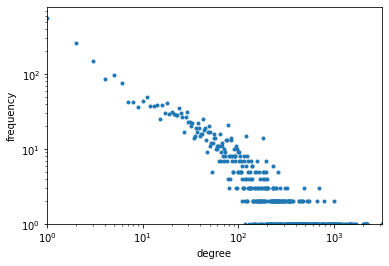

In [43]:
plot_deg_frequency(G) #Isplotujmo raspodelu netežinskog stepena čvora kao scatterplot.

Counter({0: 794, 1: 557, 2: 252, 3: 146, 5: 94, 4: 81, 6: 77, 11: 47, 7: 47, 18: 42, 10: 41, 14: 39, 13: 38, 8: 38, 21: 37, 24: 35, 12: 34, 19: 33, 16: 31, 9: 30, 25: 30, 17: 27, 29: 26, 28: 26, 22: 25, 43: 25, 20: 24, 26: 24, 23: 23, 38: 23, 15: 23, 64: 23, 27: 22, 40: 21, 31: 20, 78: 19, 34: 18, 45: 18, 36: 16, 30: 16, 44: 16, 57: 16, 39: 15, 32: 14, 67: 14, 35: 14, 121: 14, 33: 14, 48: 14, 52: 13, 49: 13, 61: 12, 59: 12, 51: 12, 41: 12, 56: 12, 76: 12, 50: 11, 54: 11, 37: 11, 46: 11, 42: 10, 74: 10, 85: 10, 90: 10, 83: 10, 94: 9, 180: 9, 79: 8, 106: 8, 55: 8, 53: 8, 120: 8, 68: 8, 112: 7, 75: 7, 117: 7, 181: 7, 71: 7, 110: 7, 65: 6, 107: 6, 58: 6, 98: 6, 185: 6, 114: 6, 89: 6, 62: 6, 73: 6, 47: 6, 153: 5, 101: 5, 199: 5, 69: 5, 81: 5, 167: 5, 60: 5, 152: 5, 127: 5, 72: 5, 80: 5, 133: 5, 176: 5, 102: 5, 128: 5, 77: 5, 214: 5, 91: 5, 235: 5, 86: 5, 124: 5, 104: 5, 63: 4, 82: 4, 203: 4, 84: 4, 99: 4, 177: 4, 108: 4, 92: 4, 242: 4, 175: 4, 160: 4, 219: 4, 105: 4, 159: 4, 66: 4, 221: 4, 

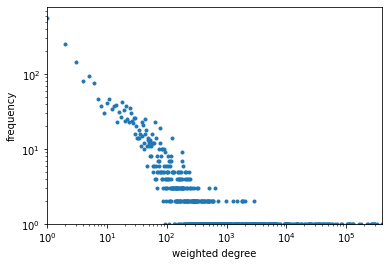

In [44]:
plot_deg_frequency(G, weighted = True) #Pošto je mreža težinska, treba ispitati i raspodelu težinskog stepena čvora.

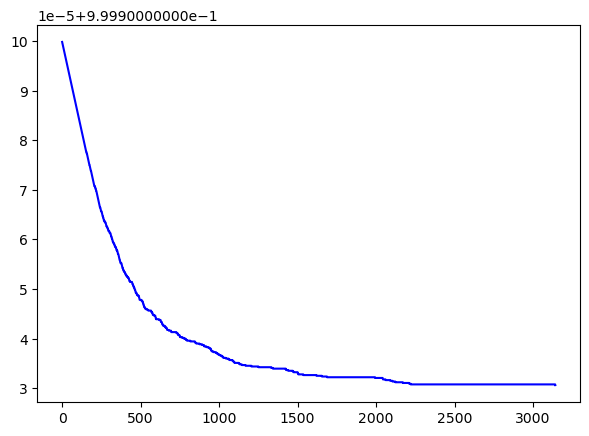

In [144]:
#Analiza i fitovanje power law mrežnog modela

#na log-log grafiku kumulativne raspodele stepena čvora bi opet trebalo da dobijemo pravu, samo sa manjim nagibom i manjim šumom u repu!
degree_sequence = sorted([d for n, d in G.degree()], reverse=True) #prodjemo kroz cvorove i njihove stepenove
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

max_deg = max(deg) # hoćemo po jedan bin za svaki stepen čvora #max stepen cvorova

# izračunavanje histograma
values, base = np.histogram(deg, bins = max_deg) #za svaki stepen po jedan bin da iscrta

# kumulativna suma (inkluzivna prefiksna suma)
cumulative = np.cumsum(values)

# plotovanje komplementarne kumulativne raspodele stepena čvora P(X>x)
plt.plot(base[:-1], [float(x)/len(dfComAndSub) for x in len(dfComAndSub) - cumulative], c='blue')

plt.show()

In [142]:
!pip install powerlaw
import powerlaw

You should consider upgrading via the 'C:\Users\Marina\anaconda3\python.exe -m pip install --upgrade pip' command.


In [148]:
results = powerlaw.Fit(degree_sequence)
print(results.power_law.alpha)#ono alfa u formuli
print(results.power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
print(results.power_law.sigma) #koliko odstupaju podaci, treba sto manje, da bude sto bolje fitovano

R, p = results.distribution_compare('power_law', 'exponential') #da li neka druga distribucija fituje bolje, treba da uporedimo nekoliko i ako powerlaw fituje najbolje, mozemo smatrati da je to powerlaw raspodela
print(f"Loglikelihood ratio: {R}") #ako je pozitivno verovatnije je da su podaci po prvoj (powerlaw) raspodeli, ako je neg. po drugoj, sto je vece, veca je verovatnoca
print(f"Statistical significance: {p}") #pretpostavimo da nije powerlaw nego random, p predstavlja koja je verovatnoca da random izvlacenjem podataka dobijemo da izleda isto tako slika, ako je velika verovatnoca, to je velika sansa da zaista nema powerlaw efekta 
# ako je mala sansa da random podacima dobijemo ovako, to znaci da vrv ima powerlaw
#u slucaju kada ovako ima dva parametra malo p znaci da je mala verovtanoca da je promasio da je prvi arg. bolji od drugog, sto je manja verovatnoca to smo sigurniji da je prvi model bolji od drugog

R, p = results.distribution_compare('power_law', 'truncated_power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'power_law') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal_positive') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'stretched_exponential') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

R, p = results.distribution_compare('truncated_power_law', 'lognormal') #truncated je da li treba odseci deo i fitovati ostatak
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}") #99,5 % - preklapaju se u velioj kolicini

results = powerlaw.Fit(degree_sequence)
print(results.truncated_power_law.alpha)#ono alfa u formuli
print(results.truncated_power_law.xmin) #od koje vr pocinje powerlaw za ove podatke, ostatak je odsekao
#print(results.truncated_power_law.sigma)  #ne postoji za truncated

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
2.2464911508648253
156.0
0.056025610831647574
Loglikelihood ratio: 22.582676543743453
Statistical significance: 0.0730904396689174


Assuming nested distributions
Assuming nested distributions


Loglikelihood ratio: -15.613893371177623
Statistical significance: 2.2945806810170666e-08
Loglikelihood ratio: 15.613893371177623
Statistical significance: 2.2945806810170666e-08
Loglikelihood ratio: 2.969746142067878
Statistical significance: 0.0014922213063029786
Loglikelihood ratio: 1.6226464808631436
Statistical significance: 0.00964979892212571
Loglikelihood ratio: 2.969746142067878
Statistical significance: 0.0014922213063029786
Calculating best minimal value for power law fit


Values less than or equal to 0 in data. Throwing out 0 or negative values


1.579835812382946%
156.0


Poređenjem sa drugim distribucijama (power law, exponential, lognormal,...) dobijamo da mreža prati najbolje truncated power law raspodelu.

Odrediti najvažnije habove i autoritete u mreži. Kako su oni raspoređeni i ugrađeni u 
mrežu, da li su na periferiji ili u jezgru mreže?

S obzirom da je graf neusmeren, habovi i autoriteti predstavljaju istu stvar i gleda se samo stepen čvora. Najbitniji su sledeći: 'reddit.com', 3143
'technology', 2221
'politics', 2211
'pics', 2171
'funny', 2123
'science', 2105
'worldnews', 2091
'entertainment', 2061
'WTF', 2044
'programming', 2043

In [162]:
degrees = [(node,val) for (node, val) in G.degree()]
largest_degrees=sorted(degrees, key=lambda x: x[1], reverse=True)[0:10]
print(largest_degrees)

[('reddit.com', 3143), ('technology', 2221), ('politics', 2211), ('pics', 2171), ('funny', 2123), ('science', 2105), ('worldnews', 2091), ('entertainment', 2061), ('WTF', 2044), ('programming', 2043)]


In [172]:
for i in range(0,10):
    ex=nx.eccentricity(Gdom,v=largest_degrees[i])
    print(ex)

{'reddit.com': 3}
{'technology': 3}
{'politics': 3}
{'pics': 3}
{'funny': 3}
{'science': 3}
{'worldnews': 3}
{'entertainment': 3}
{'WTF': 3}
{'programming': 3}


Ekscentričnost najvažnijih habova iznosi 3, dok dijametar mreže iznosi 5, 
što ukazuje da se oni nalaze bliže jezgru grafa jer se nalaze približno na polovini dijametra.

In [177]:
#Analiza različitih tipova centralnosti
input_path = "dominantna_komponenta.gml"
Gdom = nx.read_gml(input_path)

In [176]:
#metrike su pravljene za mreže koje su jedna povezana komponenta).
def calculate_centralities(G):

    DC_dict = nx.degree_centrality(G) #centr. po stepenu
    CC_dict = nx.closeness_centrality(G) #centr. po blizini
    BC_dict = nx.betweenness_centrality(G) #relaciona centr.
    EVC_dict = nx.eigenvector_centrality(G, weight='weight') #po svojstvenom vektoru

    df1 = pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df = pd.concat([df1, df2, df3, df4], axis=1)
    return df

dataCentralitiesSNet=[]
dataCentralitiesSNet = calculate_centralities(Gdom)
print(dataCentralitiesSNet)

                       DC        CC            BC           EVC
redditdev        0.092535  0.515813  1.004898e-04  8.354932e-04
todayilearned    0.030940  0.497599  1.530901e-06  1.587024e-04
sawwit           0.022140  0.494456  0.000000e+00  1.983423e-05
clink            0.000284  0.474286  0.000000e+00  2.042550e-06
confessions      0.055918  0.505452  9.412762e-06  5.246000e-04
...                   ...       ...           ...           ...
johncabellreads  0.001703  0.479777  0.000000e+00  6.777598e-06
business2        0.033494  0.498585  7.410412e-07  4.685782e-05
cherrysave       0.000852  0.479646  0.000000e+00  4.684686e-06
celebrity        0.065853  0.508590  5.092726e-05  6.285869e-04
shtruc           0.000284  0.326325  0.000000e+00  1.242337e-10

[3524 rows x 4 columns]


In [178]:
#Centralnost po stepenu - stepen čvora normalizovan maksimalnim mogućim stepenom čvora tj n-1. 
#U slučaju usmerenog grafa, ulazni i izlazni stepen čvora odgovaraju ulaznoj i izlaznoj centralnosti po stepenu. 
df_dc = pd.DataFrame({'DC':dataCentralitiesSNet['DC']})
df_dc.sort_values(by='DC', ascending=False, inplace = True)
print(df_dc.head(10)) #najvecih 10 uzimamo da analiziramo

                     DC
reddit.com     0.892137
technology     0.630429
politics       0.627590
pics           0.616236
funny          0.602611
science        0.597502
worldnews      0.593528
entertainment  0.585013
WTF            0.580187
programming    0.579903


In [179]:
#Centralnost po bliskosti - koliko je čvor *udaljen* od drugih u mreži. Čvorovi koji su centralniji su bolji izvori širenja informacija.  
#recipročna vrednost sume najkraćih rastojanja od posmatranog čvora do ostalih sa kojima je povezan, normalizovana sa N-1
df_cc = pd.DataFrame({'CC':dataCentralitiesSNet['CC']})
df_cc.sort_values(by='CC', ascending=False, inplace = True)
print(df_cc.head(10)) #dovoljno je da budu povezani sa jednim cvorom koji je blizak sa dosta njih i imace dobru centr., br hopova +1

                     CC
reddit.com     0.901946
technology     0.728344
politics       0.726092
pics           0.720155
funny          0.712581
science        0.710139
worldnews      0.708425
entertainment  0.704037
WTF            0.701374
programming    0.700816


In [200]:
#Relaciona centralnost (betweenness centrality) govori na koliko se najkraćih putanja između drugih čvorova neki čvor nalazi
# u odnosu na ukupan broj takvih najkraćih puteva
#U slučaju socijalne mreže, akter sa visokom relacionom centralnošću kontrološe tok informacija i predstavlja kandidata za brokerski čvor
df_bc = pd.DataFrame({'BC':dataCentralitiesSNet['BC']})
df_bc.sort_values(by='BC', ascending=False, inplace = True)
print(df_bc.head(10)) #povezani su sa subredditima iz raznih drugih oblasti, i onda ako drugi nisu povezani sa ostalima svi najkraci putevi idu preko njih

                     BC
reddit.com     0.240906
technology     0.032263
programming    0.028514
politics       0.028131
business       0.026983
entertainment  0.024673
pics           0.024575
worldnews      0.021995
funny          0.021117
science        0.020857


In [206]:
#Centralnost po sopstvenom vektoru - koliko je uticajan čvor u mreži. 
#Ideja je da su čvorovi povezani sa manje uticajnim susedima više uticajni (//bitniji su od njih, ovo je alternativna verzija(bonacich//) 
#i da je uticajnost čvora proporcionalna zbiru uticajnosti njegovih suseda (//vise uticajan, mocan ako su oni vise uticajni, kontradiktorno malo u odnosu na onaj prvi deo..//)
df_evc = pd.DataFrame({'EVC':dataCentralitiesSNet['EVC']})
df_evc.sort_values(by='EVC', ascending=False, inplace = True)
print(df_evc.head(10)) #puno se pojavljuju i medjusobno su povezani

                    EVC
reddit.com     0.374686
politics       0.312672
pics           0.291855
funny          0.279569
science        0.273052
technology     0.263950
worldnews      0.258876
WTF            0.257430
entertainment  0.247074
programming    0.220670


Najvažniji čvorovi po ovoj centralnosti govore o tome da su povezani sa manje uticajnim susedima.
Čvor je uticajniji ukoliko njegovi susedi takođe imaju veliki broj suseda do velikog broja aktera.
Čvor je moćniji ukoliko njegovi susedi nemaju veliki broj svojih suseda

In [198]:
#Katz centralnost

#Katz centralnost uzima u obzir putanje svih mogućih dužina koje spajaju dva čvora i uvodi podesivi parametar slabljenja  𝛼
#nedirektni susedi i ta povezanost treba da doprinosi centralnosti ali sa nekim koef. slabljenja
#Ako je G usmeren, vraća ulazne Katz centralnosti, za izlazne Katz centralnosti treba prvo uraditi G.reverse().
#Da bi vrednost centralnosti konvergirala, mora važiti 0 < alpha < 1/lambda_max, gde je lambda_max najveća sopstvena vrednost matrice susednosti. 
#ove centralnosti pogotovo poslednje dve ne rade kada ima ovako vise od jedne povezane komponente!!

lambda_max =  max(nx.adjacency_spectrum(Gdom))
print(1/lambda_max)

(5.451924710308545e-06+0j)


In [197]:
#Katz, svi subredditi imaju parametar beta=1

dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 1
    
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.274342
politics        0.230443
pics            0.216083
funny           0.207448
science         0.202978
technology      0.196527
worldnews       0.192860
WTF             0.192017
entertainment   0.184611
programming     0.165985


In [196]:
#Katz centralnost, svi beta=1 ali prosledjen broj umesto recnika
dataCentralitiesSNet.drop('Katz', inplace=True, axis=1)


KatzC_dict = nx.katz_centrality(Gdom, alpha=0.0000005, beta=1.0, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight') #//treba da probamo alfa za npr desetak tacaka u dozvoljenomg opsegu i vidimo, meni ispadaju iste vrednosti za sve vr alfa manje od 0.000005, vece ne sme zbog lambda max
df_katzc = pd.DataFrame.from_dict(KatzC_dict, orient='index', columns=['Katz'])
dataCentralitiesSNet = pd.concat([dataCentralitiesSNet,df_katzc], axis=1)

df_katzc = pd.DataFrame({'Katz':dataCentralitiesSNet['Katz']})
df_katzc.sort_values(by='Katz', ascending=False, inplace = True)
print(df_katzc.head(10))

                   Katz
reddit.com     0.020481
politics       0.019824
pics           0.019665
funny          0.019546
science        0.019502
technology     0.019405
WTF            0.019352
worldnews      0.019341
entertainment  0.019232
programming    0.018969


In [191]:
#Katz sa razlicitim beta za reddit.com, sa weight

dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.374045
politics        0.262970
pics            0.245130
funny           0.235010
science         0.229711
technology      0.222641
worldnews       0.218074
WTF             0.216820
entertainment   0.208948
programming     0.187157


In [192]:
#Katz sa razlicitim beta za reddit.com, bez weight

dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1 
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.000005, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight=None)
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.166313
technology      0.016790
politics        0.016790
pics            0.016786
funny           0.016782
science         0.016781
worldnews       0.016780
entertainment   0.016777
WTF             0.016776
programming     0.016776


In [199]:
#Katz sa razlicitim beta za reddit.com, sa weight, alfa=0.00000025

dataCentralitiesSNet.drop('Katz_Beta', inplace=True, axis=1)

betadict={}
for subreddit in Gdom.nodes():
    betadict[subreddit] = 0.1
    
betadict['reddit.com'] = 1 
KatzC_dictBeta = nx.katz_centrality(Gdom, alpha=0.00000025, beta=betadict, max_iter=1000, tol=1e-06, nstart=None, normalized=True, weight='weight')
df_katzc = pd.DataFrame.from_dict(KatzC_dictBeta, orient='index', columns=['Katz_Beta'])
dataCentralitiesSNet['Katz_Beta']=df_katzc

df_katzc = pd.DataFrame({'Katz_Beta':dataCentralitiesSNet['Katz_Beta']})
df_katzc.sort_values(by='Katz_Beta', ascending=False, inplace = True)
print(df_katzc.head(10))

               Katz_Beta
reddit.com      0.167726
politics        0.019152
pics            0.018866
funny           0.018753
science         0.018700
technology      0.018673
worldnews       0.018577
WTF             0.018554
entertainment   0.018545
business        0.018334


In [202]:
#Kompozitni rang
#𝑐𝑜𝑚𝑝𝑜𝑠𝑖𝑡𝑒_𝑟𝑎𝑛𝑘=𝐷𝐶_𝑟𝑎𝑛𝑘∗𝐶𝐶_𝑟𝑎𝑛𝑘∗𝐵𝐶_𝑟𝑎𝑛𝑘∗𝐸𝑉𝐶_𝑟𝑎𝑛𝑘*Katz_rank
df_ = dataCentralitiesSNet
labele = ['DC', 'CC', 'BC', 'EVC','Katz']
for metric in labele:
    df_[f"{metric}_rank"] = dataCentralitiesSNet[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['DC_rank'] * df_['CC_rank'] * df_['BC_rank'] * df_['EVC_rank'] * df_['Katz_rank']

df_=df_.sort_values(['composite_rank'], ascending = True)
print(df_.head(10))

                     DC        CC        BC       EVC      Katz  Katz_Beta  \
reddit.com     0.892137  0.901946  0.368655  0.374686  0.020481   0.167726   
politics       0.627590  0.726092  0.043049  0.312672  0.019824   0.019152   
technology     0.630429  0.728344  0.049371  0.263950  0.019405   0.018673   
pics           0.616236  0.720155  0.037606  0.291855  0.019665   0.018866   
funny          0.602611  0.712581  0.032315  0.279569  0.019546   0.018753   
science        0.597502  0.710139  0.031917  0.273052  0.019502   0.018700   
worldnews      0.593528  0.708425  0.033658  0.258876  0.019341   0.018577   
programming    0.579903  0.700816  0.043635  0.220670  0.018969   0.018298   
entertainment  0.585013  0.704037  0.037757  0.247074  0.019232   0.018545   
WTF            0.580187  0.701374  0.028495  0.257430  0.019352   0.018554   

               DC_rank  CC_rank  BC_rank  EVC_rank  Katz_rank  composite_rank  
reddit.com         1.0      1.0      1.0       1.0        1.0

In [ ]:
#SPEKTRALNA ANALIZA
#//pronalazi dobru podelu grafova, za pronalazenje komuna
#//izvodi zakljucke o grafovima na osnovu specigicnih matricnih reprezentacija,
#//spektar matrice je skup sopstvenih vrednosti matrice
#//neke beleske za ovo imas u folderu spektralna analiza prezentacija
#//velika slozenost, dobro za manje mreze
#//dobro za odjredjivanja broja komuna i podelu na komune, pogotovo kad su komune nejednake velicine, tolerise
#//predstavlja optimizaciju Ratio cut, radi posle s k-means
#//koristi matricu slicnosti, odnosno u slucaju grafova tezine odnosno matricu susednosti
#//ovde ima dosta matematike koja nam ne treba, mozda pitati pedju da posalje skracenu verziju
#//bitni su ovi grafici (1, 2, 4, i 5.)


In [205]:
from scipy import linalg
#from docx import Document #//baca gresku ovo
import math #?
import sympy
from sklearn.cluster import SpectralClustering

In [207]:
def plot_scatterplot(x_data, y_data, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{title}.svg")
    plt.show() 

def plot_scatterplot2(x_data, y_data, x_label, y_label, title, file_name):
    fig, ax = plt.subplots()
    ax.scatter(x_data, y_data) 
    ax.set_ylabel(y_label, fontsize=15)
    ax.set_xlabel(x_label, fontsize=15)
    ax.set_title(title)
    plt.savefig(f"{file_name}.svg")
    plt.show() 

In [208]:
G2 = Gdom

In [212]:
def in_range(value, target, tolerated_error):
    return abs(value-target) < tolerated_error

def filter_matrix(m, tolerated_error):
    new_matrix = []
    for row in m:
        new_row = []
        for value in row:
            if in_range(0 , value, tolerated_error):
                new_row.append(0.0)
            else:
                new_row.append(value)
        new_matrix.append(new_row)
    return new_matrix

     k      lambda_k
0    1 -2.620506e-11
1    2  2.681532e-01
2    3  5.110828e-01
3    4  5.758798e-01
4    5  7.384283e-01
5    6  7.639315e-01
6    7  7.643149e-01
7    8  8.297834e-01
8    9  8.362588e-01
9   10  8.379027e-01
10  11  8.416228e-01
11  12  9.072753e-01
12  13  9.099429e-01
13  14  9.293559e-01
14  15  9.371039e-01
15  16  9.415129e-01
16  17  9.616547e-01
17  18  9.654971e-01
18  19  9.706613e-01
19  20  9.738569e-01
20  21  9.824536e-01
21  22  9.835595e-01
22  23  9.848467e-01
23  24  9.886509e-01
24  25  9.933860e-01
25  26  9.937786e-01
26  27  9.939394e-01
27  28  9.953147e-01
28  29  9.958993e-01
29  30  9.960289e-01


C:\Users\Marina\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


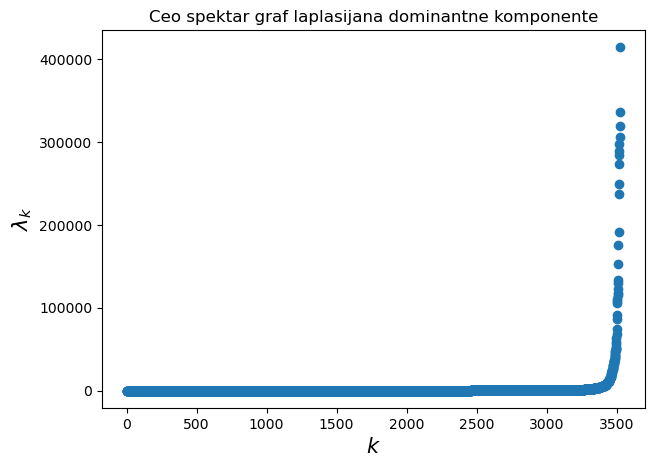

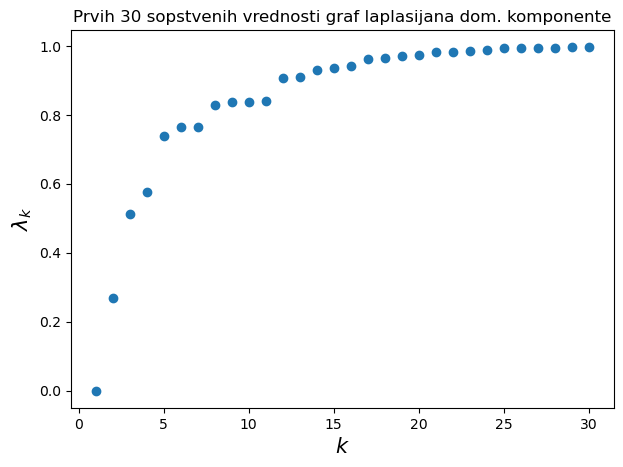

In [213]:
#//uzima se samo dominantna komponenta, ne ceo graf, ako ona pokriva preko posto cvorova, gleda se samo ona 
#ili ako ostale imaju mali broj cvorova, krnje
#//ako postoji vise gigantskih, racuna se za svaku posebno
#//to vazi i za centralnosti
#//gledaju su ovde gde su najveci skokovi, to je kod tacke 12, tako da bi podela na 12 bila verovatno najbolja

dominant_component = G2 #vec je dominantna

L_dom = nx.laplacian_matrix(dominant_component).toarray()

eigenvalues = linalg.eigvals(L_dom) # TODO: change to .eigenvalsh because we know the matrix is symmetric
eigenvalues.sort()
enumerator = np.array(range(1, len(eigenvalues)+1))
df_eig = pd.DataFrame(list(zip(enumerator, eigenvalues)))

# write eigenvalue table
df_eig30 = df_eig[:30]
df_eig30.columns = ['k', 'lambda_k']
df_eig30 = df_eig30.astype({'k': 'int32', 'lambda_k':'float'})
print(df_eig30)

#doc = Document() #//ne radi mi zbog importa nista ovo
#doc = docx.Document('tabela_eig.docx') #//bilo i njemu zakomentarisano
#t = doc.add_table(df_eig30.shape[0]+1, df_eig30.shape[1])
#t.cell(0,0).text = r'$k$'
#t.cell(0,1).text = r'$\lambda_k$'
#for i in range(df_eig30.shape[0]):
#    for j in range(df_eig30.shape[-1]):
#        t.cell(i+1,j).text = str(df_eig30.values[i,j])
#doc.save('etf/tabela_eig_dominantna_komponenta.docx')


plot_scatterplot(enumerator, eigenvalues, r'$k$', r'$\lambda_k$', 'Ceo spektar graf laplasijana dominantne komponente')

df_eig_30 = df_eig[:30]
plot_scatterplot(df_eig_30.iloc[:,0], df_eig_30.iloc[:,1], r'$k$', r'$\lambda_k$', 'Prvih 30 sopstvenih vrednosti graf laplasijana dom. komponente')


C:\Users\Marina\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1201: ComplexWarning: Casting complex values to real discards the imaginary part
  return arr.astype(dtype, copy=True)


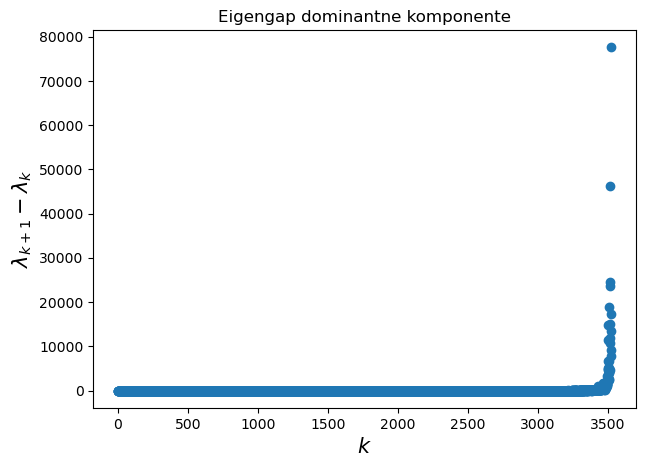

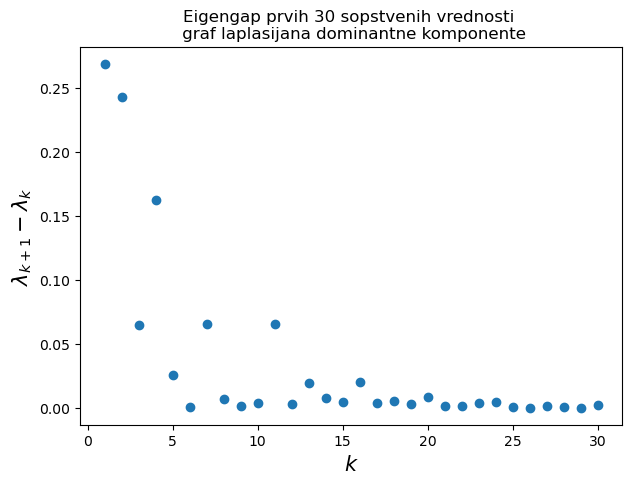

In [214]:
# eigengap

df_gap = df_eig.iloc[:,1].diff()
df_gap = df_gap.astype(np.float64)

df_gap = df_gap[1:]
enumerator_column = np.array(range(1, len(df_gap)+1))

df_gap = pd.DataFrame(list(zip(enumerator_column, df_gap)))
  
plot_scatterplot(df_gap.iloc[:,0], df_gap.iloc[:,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap dominantne komponente')

plot_scatterplot2(df_gap.iloc[:30,0], df_gap.iloc[:30,1], r'$k$', r'$\lambda_{k+1}-\lambda_k$','Eigengap prvih 30 sopstvenih vrednosti \n graf laplasijana dominantne komponente', 'Eigengap prvih 30 sopstvenih vrednosti graf laplasijana dominantne komponente')

In [215]:
#//deo koji radi klasterisanje!!

for k in range(2, 30):
    
    #//prima broj klastera (n_cluster), a fit matricu slicnosti, odn. ako su tezine u pitanju matricu susednosti iz networkx
    clustering = SpectralClustering(n_clusters=k,
    assign_labels="discretize", affinity="precomputed").fit(nx.adjacency_matrix(dominant_component))

    colors = clustering.labels_
    c_string = []
    for c in colors:
        c_string.append(str(c))

    G = nx.Graph()
    for c, label in zip(c_string, dominant_component.nodes()):
        G.add_node(label, color=c)

    for edge in dominant_component.edges(data=True):
        #print(edge)
        G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])

    nx.write_gml(G, "spectral.gml")
    
    csizes = np.zeros(k)
    for c in colors:
        csizes[int(c)] += 1
    
    print(f"Podela na {k}: velicine komponenata su {csizes}")
    

Podela na 2: velicine komponenata su [3.521e+03 3.000e+00]
Podela na 3: velicine komponenata su [3.516e+03 3.000e+00 5.000e+00]
Podela na 4: velicine komponenata su [3.462e+03 3.000e+00 5.000e+00 5.400e+01]
Podela na 5: velicine komponenata su [3.455e+03 3.000e+00 7.000e+00 5.000e+00 5.400e+01]
Podela na 6: velicine komponenata su [3.448e+03 3.000e+00 7.000e+00 7.000e+00 5.000e+00 5.400e+01]
Podela na 7: velicine komponenata su [3.442e+03 3.000e+00 7.000e+00 7.000e+00 5.000e+00 6.000e+00 5.400e+01]
Podela na 8: velicine komponenata su [3.438e+03 4.000e+00 3.000e+00 7.000e+00 7.000e+00 5.000e+00 6.000e+00
 5.400e+01]
Podela na 9: velicine komponenata su [3.428e+03 4.000e+00 3.000e+00 7.000e+00 7.000e+00 5.000e+00 6.000e+00
 1.000e+01 5.400e+01]
Podela na 10: velicine komponenata su [3.428e+03 4.000e+00 3.000e+00 7.000e+00 6.000e+00 7.000e+00 5.000e+00
 6.000e+00 5.400e+01 4.000e+00]
Podela na 11: velicine komponenata su [3.412e+03 4.000e+00 3.000e+00 3.000e+00 7.000e+00 7.000e+00 5.000e

Na osnovu spektralne analize procenjujemo da je dobar izbor za broj komuna 2, 3, 5, 7, 11

In [ ]:
Sprovesti klasterisanje Luvenskom metodom (maksimizacijom modularnosti) u alatu 
Gephi za tri različite vrednosti parametra rezolucije. Konstruisati vizuelizacije i 
diskutovati izbor parametra rezolucije na dobijeno klasterisanje (broj i veličina klastera).
Resolution: 0.1
Modularity: -0.016
Modularity with resolution: -0.026
Number of Communities: 147
Ima 147 klastera, od toga se veličinom ističe jedan klaster sa oko 650 čvorova u njemu
    
Resolution: 0.5
Modularity: 0.011
Modularity with resolution: -0.030
Number of Communities: 24
Ima 24 klastera, od toga se veličinom ističu tri klastera sa oko 500, 700, 750 čvorova u njemu

    
Resolution: 1.0
Modularity: 0.104
Modularity with resolution: 0.104
Number of Communities: 55
Ima 55 klastera, od toga se veličinom ističu dva klastera sa oko 1450 i 1700 čvorova u njemu 
    
Resolution: 3.0
Modularity: 0.000
Modularity with resolution: 2.000
Number of Communities: 6
Ima 24 klastera, od toga se veličinom ističe jedan klaster sa oko 3500 čvorova u njemu


Čvorovi sa najvećim stepenom za dva najveća klastera za rezoluciju 1.0 putem Luvenske metode prikazana su na sledećim slikama:..

Ko su akteri koji se mogu okarakterisati kao ključni brokeri (mostovi) u mreži? Šta ih čini 
brokerima?

Čvorovi sa najvećom relacionom centralnošću:
reddit.com     0.901946
technology     0.728344
politics       0.726092
pics           0.720155
funny          0.712581
science        0.710139
worldnews      0.708425
entertainment  0.704037
WTF            0.701374
programming    0.700816

I čvorovi koji su se pojavljuju u najvećem broju mostova iz funkcije networkx:

('reddit.com', 357),
 ('business', 21),
 ('programming', 15),
 ('Chinese', 13),
 ('politics', 9),
 ('technology', 9),
 ('entertainment', 8),
 ('worldnews', 7),
 ('pics', 7),
 ('science', 6)

In [234]:
mostovi = list(nx.bridges(Gdom))
cvorovi_mosta = []

for grana in mostovi:
    cvorovi_mosta.append(grana[0])
    cvorovi_mosta.append(grana[1])
    
from collections import Counter
Counter(cvorovi_mosta).most_common()[0:20]

[('reddit.com', 357),
 ('business', 21),
 ('programming', 15),
 ('Chinese', 13),
 ('politics', 9),
 ('technology', 9),
 ('entertainment', 8),
 ('worldnews', 7),
 ('pics', 7),
 ('science', 6),
 ('WTF', 5),
 ('nsfw', 4),
 ('funny', 4),
 ('gossip', 3),
 ('es', 3),
 ('dezvoltarepersonala', 3),
 ('AskReddit', 2),
 ('de', 2),
 ('Peiman', 2),
 ('ads', 2)]

In [232]:
#contr=nx.constraint(Gdom,weight='weight') 
#sluzilo bi za odredjivanje brokera(mala vrednost znaci da je broker, ali izvrsavanje traje predugo...

In [280]:
#USERNET
#ovde cemo prolaziti kroz sve komentare, dohv autora, dohv parent_id i onda traziti ga medju svim id u objavama 
#i komentarima
#u dokumentaciji ne pise lepo za parent_id, dopunjeno je oznakom t3_ ili t1_ pa tek onda ide id objave/komentara!!
#t3 znaci da je to komentar na objavu (i da je ista vr kao link id jer on vodi ka objavi na kojoj je komentar),
#a t1 da je komentar na komentar
#mora se vratiti izbrisana kolona id! i onda kad nadjemo poklapanje dohvatimo njegovog autora i napravimo granu izmedju njih dvojice
#usmerena, agregacija brojanjem
#nekoliko problema jos: kolona id za objave nije bila jedinstvena,    kolona id za komentare je sadrzala jedno null polje ->
#na te objave se ne odnosi nijedan komentar iz tabele komentari pa nisu od znacaja
#i svi redovi gde je autor bio deleted su obrisani, a time i te objave/komentari -> to nam ne bi ni znacilo jer odatle ne 
#mozemo dohvatiti autora

with open("ASM_PZ2_podaci_2122/reddit2008/comments_2008_asm_v1.1/comments_2008/data_cleaned", 'rb') as file:
    dfComments = pickle.load(file)
    
with open("ASM_PZ2_podaci_2122/reddit2008/submissions_2008_asm/data_cleaned", 'rb') as file:
    dfSubmissions = pickle.load(file)
    
GUsernet = nx.DiGraph() #DiGraph treba
list_authors_sub = set(dfSubmissions['author'].unique())
list_authors_com = set(dfComments['author'].unique())
set_of_authors = list_authors_sub.union(list_authors_com)
GUsernet.add_nodes_from(set_of_authors) 


In [281]:

dfSubmissions.set_index('id',inplace=True)
dfComments.set_index('id',inplace=True)
i=0
for index, row in dfComments.iterrows():
    i=i+1
    if (i%10000)==0:
        print(i)
    author1=row['author'] 
    parent_id=row['parent_id']
    tip=parent_id[1:2]
    id=parent_id[3:]
    authors2=[]
    author2=''
    if tip=='3':
        try:
            row2=dfSubmissions.loc[id]
            author2=row2['author']
        except KeyError:
            author2=''
        if author2!='':
            if (author1, author2) in GUsernet.edges:
                 GUsernet.edges[author1, author2]['weight'] += 1 
            else: 
                 GUsernet.add_edge(author1, author2, weight=1)
        
    else:
        if tip=='1':
            try:
                row2=dfComments.loc[id]
                author2=row2['author']
            except KeyError:
                author2=''
            if author2!='':
                if (author1, author2) in GUsernet.edges:
                     GUsernet.edges[author1, author2]['weight'] += 1 
                else: 
                     GUsernet.add_edge(author1, author2, weight=1)
                        
dfComments = dfComments.reset_index()  # make sure indexes pair with number of rows
dfSubmissions = dfSubmissions.reset_index()  # make sure indexes pair with number of rows


10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [344]:
dfCommentsSmall=dfComments.head(10000)

dfSubmissions.set_index('id',inplace=True)
dfComments.set_index('id',inplace=True)
def findAuthor5(parent_id):
    tip=parent_id[1:2]
    id=parent_id[3:]
    author2=''
    if tip=='3':
        try:
            row2=dfSubmissions.loc[id]
            return row2['author']
        except KeyError:
            return None
        
        
    else:
        if tip=='1':
            try:
                row2=dfComments.loc[id]
                return row2['author']
            except KeyError:
                return None
                
for index, row in dfCommentsSmall.iterrows():
    author1=row['author'] 
    parent_id=row['parent_id']
    author2=findAuthor5(parent_id)
    
                        
dfComments = dfComments.reset_index()  # make sure indexes pair with number of rows
dfSubmissions = dfSubmissions.reset_index()  # make sure indexes pair with number of rows


In [342]:

dfComments.drop('subreddit_id', inplace=True, axis=1)
print(dfSubmissions)
print(dfComments)


            id  level_0    index  \
0        648oo        0        0   
1        648op        1        1   
2        648or        2        2   
3        648os        3        3   
4        648ot        4        4   
...        ...      ...      ...   
2044805  7amgd  2044805  2044805   
2044806  7amge  2044806  2044806   
2044807  7amgg  2044807  2044807   
2044808  7amgh  2044808  2044808   
2044809  7amgi  2044809  2044809   

                                                 permalink        author  \
0        /r/reddit.com/comments/648oo/brain_disease_is_...         DITUS   
1        /r/science/comments/648op/three_more_florida_c...        rmuser   
2        /r/reddit.com/comments/648or/nude_couple_grapp...         zorno   
3        /r/politics/comments/648os/apparently_bushs_pr...        rmuser   
4        /r/reddit.com/comments/648ot/diners_find_rare_...         zorno   
...                                                    ...           ...   
2044805  /r/Health/comments/7amgd/l

In [329]:
def funkcija():
    global dfSubmissions
    global dfComments
    global dfCommentsSmall
    dfSubmissions.set_index('id',inplace=True)
    dfComments.set_index('id',inplace=True)
    for index, row in dfCommentsSmall.iterrows():
        author1=row['author'] 
        parent_id=row['parent_id']
        author2=findAuthor5(parent_id)
    dfComments = dfComments.reset_index()  # make sure indexes pair with number of rows
    dfSubmissions = dfSubmissions.reset_index()  # make sure indexes pair with number of rows


In [315]:

dfSubmissions.set_index('id',inplace=True)
dfComments.set_index('id',inplace=True)
dfCommentsSmall=dfComments.head(10000)

for index, row in dfCommentsSmall.iterrows():
    author1=row['author'] 
    parent_id=row['parent_id']
    author2=findAuthor(parent_id)

    
def findAuthor(id):
    id=id[3:]
    tip=id[1:2]

    if tip=='3':
        try:
            row2=dfSubmissions.loc[id]
            return row2['author']
        except KeyError:
            return None
        
    else:
        if tip=='1':
            try:
                row2=dfComments.loc[id]
                return row2['author']
            except KeyError:
                return None
            
dfComments = dfComments.reset_index()  # make sure indexes pair with number of rows
dfSubmissions = dfSubmissions.reset_index()  # make sure indexes pair with number of rows


In [302]:
sData=dfSubmissions
cData=dfComments
dfCommentsSmall=dfComments.head(1000)
UserNet2=nx.DiGraph()
temp=pd.concat([sData,cData])
temp.set_index('id',inplace=True)

def findAuthor(id):
    id=id[3:]
    try:
            row=temp.loc[id]
            return row['author']
    except KeyError:
            return None

for index, row in dfCommentsSmall.iterrows():

    author1=row['author'] 
    parent_id=row['parent_id']
    author2=findAuthor(parent_id)
    
    


In [301]:

import cProfile
arg1='t1_c02s9rv'
cProfile.run('findAuthor(arg1)', filename=None, sort=-1)


         55 function calls in 0.152 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.152    0.152 2016285515.py:8(findAuthor)
        1    0.001    0.001    0.004    0.004 <__array_function__ internals>:2(where)
        1    0.000    0.000    0.152    0.152 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 base.py:2130(is_floating)
        1    0.000    0.000    0.152    0.152 base.py:3317(get_loc)
        1    0.000    0.000    0.000    0.000 base.py:3667(_get_partial_string_timestamp_match_key)
        1    0.000    0.000    0.000    0.000 base.py:5695(_maybe_cast_indexer)
        1    0.000    0.000    0.000    0.000 base.py:774(<lambda>)
        1    0.000    0.000    0.000    0.000 common.py:100(is_bool_indexer)
        1    0.000    0.000    0.000    0.000 common.py:155(cast_scalar_indexer)
        1    0.000    0.000    0.000    0.000 common.py:346(apply_if_callable)
 

In [314]:

import cProfile
arg1='t1_c02s9rv'
cProfile.run('findAuthor(arg1)', filename=None, sort=-1)


         4 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 1015595011.py:11(findAuthor)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [331]:

import cProfile
cProfile.run('funkcija()', filename=None, sort=-1)


         4064260 function calls (4017602 primitive calls) in 119.341 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    10000    0.035    0.000  117.505    0.012 1696332700.py:5(findAuthor5)
        1    0.338    0.338  119.340  119.340 339320906.py:1(funkcija)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(argsort)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(atleast_2d)
        2    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(bincount)
       12    0.000    0.000    0.332    0.028 <__array_function__ internals>:2(concatenate)
        6    0.000    0.000    0.005    0.001 <__array_function__ internals>:2(copyto)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(insert)
        4    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(moveaxis)
        6    0.000    0.000    0.000    0.000 <__ar

In [282]:
print(nx.info(GUsernet))

output_pathUserNet = "UserNet.gml"
nx.write_gml(GUsernet, output_pathUserNet)

DiGraph with 226649 nodes and 2834404 edges
